### IESB
___
### Pós Graduação em Inteligência Artificial
#### Disciplina: Aprendizado Supervisionado
#### Discente: Henrique Brandão

Utilizaremos os dados relativos ao naufrágio da embarcação *Titanic* (1915).

|Atributos|Tipo|Descrição|
|--|--|--|
|`PassengerId`|`int`|Indentificador do passageiro (chave primária)|
|`Pclass`|`int`|Classe da acomodação do passageiro (`1`: 1a; `1`: 2a; `3`: 3a)|
|`Name`|`str`|Nome do passageiro|
|`Sex`|`str`|Gênero do passageiro|
|`Age`|`float`|Idade do passageiro|
|`SibSp`|`int`|Quantidade de irmãos e cônjuges do passageiro a bordo|
|`Parch`|`int`|Quantidade de pais e filhos do passageiro a bordo|
|`Ticket`|`str`|*Id* do ticket|
|`Fare`|`float`|Preço do ticket|
|`Cabin`|`str`|Cabine do passageiro|
|`Embarked`|`str`|Local de embarque (`C`: Cherbourg; `Q`: Queenstown; `S`: Southampton)|
|`Survived`|`int`|Estado de sobrevivência (`1`: sim; `0`: não)|

O *target* da nossa classificação será o atributo `Survived`.

Fonte: [Kaggle - Titanic](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from datass.dataframe.inspection import _isnull

%matplotlib inline 

### Carregar os dados
___

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_test.shape

((891, 12), (418, 11))

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Preencher valores faltantes
___

### Treino

In [6]:
TRAIN_AGE_MEAN = df_train['Age'].mean()
TRAIN_AGE_MEAN

29.69911764705882

In [7]:
df_train['Age'].fillna(value=TRAIN_AGE_MEAN, inplace=True)

In [8]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
_ = {**df_train['Embarked'].value_counts()}

TRAIN_EMBARKED_FILLNA = max(_, key=_.get)
TRAIN_EMBARKED_FILLNA

'S'

In [10]:
df_train['Embarked'].fillna(value=TRAIN_EMBARKED_FILLNA, inplace=True)

In [11]:
_isnull(df_train)

>> Null registers:

# PassengerId: 0 null rows
# Survived: 0 null rows
# Pclass: 0 null rows
# Name: 0 null rows
# Sex: 0 null rows
# Age: 0 null rows
# SibSp: 0 null rows
# Parch: 0 null rows
# Ticket: 0 null rows
# Fare: 0 null rows
# Cabin: 687 rows
# Embarked: 0 null rows


Text(0.5, 1.0, 'Matriz de correlacão - df_train')

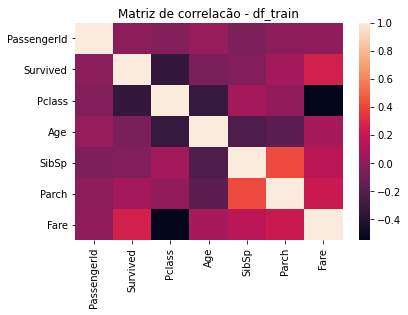

In [12]:
sns.heatmap(df_train.corr())
plt.title('Matriz de correlacão - df_train')

### Teste

In [13]:
TESTE_AGE_MEAN = df_test['Age'].mean()
TESTE_AGE_MEAN

30.272590361445783

In [14]:
df_test['Age'].fillna(value=TRAIN_AGE_MEAN, inplace=True)

In [15]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
_ = {**df_test['Embarked'].value_counts()}

TEST_EMBARKED_FILLNA = max(_, key=_.get)
TEST_EMBARKED_FILLNA

'S'

In [17]:
df_test['Embarked'].fillna(value=TRAIN_EMBARKED_FILLNA, inplace=True)

In [18]:
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)

In [19]:
df_test['Cabin'].fillna(value='', inplace=True)

In [20]:
_isnull(df_test)

>> Null registers:

# PassengerId: 0 null rows
# Pclass: 0 null rows
# Name: 0 null rows
# Sex: 0 null rows
# Age: 0 null rows
# SibSp: 0 null rows
# Parch: 0 null rows
# Ticket: 0 null rows
# Fare: 0 null rows
# Cabin: 0 null rows
# Embarked: 0 null rows


Text(0.5, 1.0, 'Matriz de correlacão - df_test')

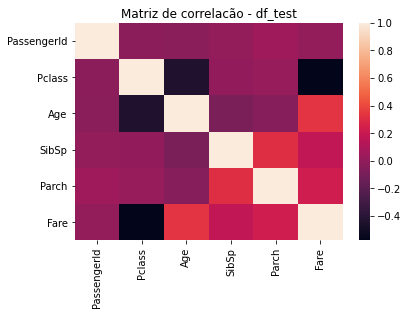

In [21]:
sns.heatmap(df_test.corr())
plt.title('Matriz de correlacão - df_test')

### Limpeza de dados
___

In [22]:
DROP_COLS = ['Embarked', 'PassengerId', 'Name', 'Ticket', 'Cabin']

In [23]:
ENCODE_SEX = {'female': 0, 'male': 1}

def encode_sex(sex: str):
    return ENCODE_SEX[sex]

### Treino

In [24]:
df_train.drop(columns=DROP_COLS, inplace=True)

In [25]:
df_train['Sex'] = df_train['Sex'].apply(encode_sex)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


### Teste

In [27]:
df_test.drop(columns=DROP_COLS, inplace=True)

In [28]:
df_test['Sex'] = df_test['Sex'].apply(encode_sex)

In [29]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


### Dados de treino e teste
___

In [30]:
TARGET = 'Survived'
FEATURES = list(set(df_train.columns) - {TARGET})

In [31]:
X = df_train[FEATURES]
Y = df_train[TARGET]
X.shape, Y.shape

((891, 6), (891,))

In [32]:
X.head()

,Fare,Sex,Age,SibSp,Parch,Pclass
0,7.2500,1,22.0,1,0,3
1,71.2833,0,38.0,1,0,1
2,7.9250,0,26.0,0,0,3
3,53.1000,0,35.0,1,0,1
4,8.0500,1,35.0,0,0,3


In [33]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=666,
                                                test_size=0.3, stratify=Y, shuffle=True)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((623, 6), (623,), (268, 6), (268,))

### Modelos
___

### Base

In [35]:
modelo_svm = SVC()
modelo_tree = DecisionTreeClassifier()
modelo_lr = LogisticRegression()
modelo_nb = GaussianNB()

MODELOS_BASE = [modelo_svm, modelo_tree, modelo_lr, modelo_nb]

#### # Treinamento

In [36]:
for modelo in MODELOS_BASE:
    modelo.fit(xtrain, ytrain)

#### # Predições

In [37]:
pred_svm = modelo_svm.predict(xtest)
pred_tree = modelo_tree.predict(xtest)
pred_lr = modelo_lr.predict(xtest)
pred_nb = modelo_nb.predict(xtest)

PREDICOES_BASE = dict(zip(['pred_svm', 'pred_tree', 'pred_lr', 'pred_nb'],
                          [pred_svm, pred_tree, pred_lr, pred_nb]))

#### # Performance

In [38]:
for pred in PREDICOES_BASE:
    print(f'# {pred.upper()} {"-" * 45}\n{classification_report(y_true=ytest, y_pred=PREDICOES_BASE[pred])}')

# PRED_SVM ---------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.93      0.77       165
           1       0.68      0.25      0.37       103

    accuracy                           0.67       268
   macro avg       0.67      0.59      0.57       268
weighted avg       0.67      0.67      0.62       268

# PRED_TREE ---------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.78      0.71      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

# PRED_LR ---------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.73      0.64      0.68       103

    accurac

### Meta estimador

####  # Dados

In [39]:
df_stack = pd.DataFrame()

In [40]:
for m in PREDICOES_BASE:
    df_stack[m] = PREDICOES_BASE[m]

df_stack['ytest'] = np.array(ytest).reshape(-1, 1)

df_stack.shape

(268, 5)

In [41]:
df_stack.head()

,pred_svm,pred_tree,pred_lr,pred_nb,ytest
0,0,0,0,1,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [42]:
X = df_stack.drop(labels='ytest', axis=1)
Y = df_stack['ytest']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=666,
                                                test_size=0.3, stratify=Y, shuffle=True)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((187, 4), (187,), (81, 4), (81,))

#### # Treinamento

In [43]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [44]:
pred_rf = modelo_rf.predict(xtest)

#### # Performance

In [45]:
print(classification_report(y_true=ytest, y_pred=pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.71      0.81      0.76        31

    accuracy                           0.80        81
   macro avg       0.79      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81



### Comparativo

In [46]:
modelo_comp = GaussianNB().fit(xtrain, ytrain)
pred_modelo_comp = modelo_comp.predict(xtest)
print(classification_report(y_true=ytest, y_pred=pred_modelo_comp))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.71      0.81      0.76        31

    accuracy                           0.80        81
   macro avg       0.79      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81

